# Digital Audio – 3 Fourier Transform

#### Marc Evrard

#### LIMSI-CNRS laboratory – University of Paris-Sud

January 7, 2015

<img src="pics/limsilogo.png" width="100" style="float: left">
<img src="pics/u-psud_logo_vect.png"width="100" style="float: right">

<marc.evrard@limsi.fr>

# Fourier Transform

## Complex representation

Euler formula:

$$e^{jx} = \cos (x) + j\sin (x) \ $$

Or:

$$\cos (x) = \mathrm{Re}\{e^{jx}\} ={e^{jx} + e^{-jx} \over 2} \\
\sin (x) = \mathrm{Im}\{e^{jx}\} ={e^{jx} - e^{-jx} \over 2j}$$

## Phasor

<center><img src="pics/Sinehorizontal.gif"></center>
<center>Image taken from [<http://www.math.ucla.edu/~shac/MATH495.html>]</center>

## Fourier Series (FS)

Joseph Fourier (1822): "_Any continuous periodic function can be decomposed into the sum of a (possibly infinite) set of simple oscillating functions_" (sine waves)

* __Analysis__: determination of the __Fourier coefficients series__ (in the __frequency domain__)

* __Synthesis__: synthesis of the __periodic function__ (__time domain__) using the coefficient series

The simple oscillating serie corresponds to the harmonics constitutive of the original signal.

__Analysis__:
$$c_k = \frac{1}{T_0} \int_{-T_0/2}^{T_0/2} f(t) e^{-j 2\pi\frac{k}{T_0}t}\mathrm dt$$
__Synthesis__:
$$ s(t)=\sum_{k=-\infty}^{+\infty}c_k \; e^{j 2\pi\frac{t}{T_0} k} $$

$T_0 \;(= 1/f_0)$, the period of the function (_not to confuse with $f_s$ the sampling rate, no sampling here_)

## Examples of FS functions

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, exp, log10, pi, sin, sqrt

In [4]:
fs = 16000
dur = 1
f0 = 40
T0 = 1 / f0
order = 10

In [5]:
def fs_mtx(N, dur=1):
    """Build the FS synthesis matrix"""
    t_arr = np.arange(0, dur, 1 / fs)
    k_arr = np.arange(-N, N + 1)
    t_vct, k_vct = np.asmatrix(t_arr), np.asmatrix(k_arr)

    return np.matrix(exp(1j * 2 * pi / T0 * k_vct.T * t_vct))


def fs_synth(shape, N, dur=1):
    """Synthesize using the FS"""
    k_arr = np.arange(-N, N + 1)

    if shape == "saw":
        c_k_vct = np.matrix(
            [1j / (pi * k) * (-1) ** k if k != 0 else 0 for k in k_arr]
        )
    else:
        c_k_vct = np.matrix(
            [-1j / (pi * k) if np.mod(k, 2) != 0 else 0 for k in k_arr]
        )
        c_k_vct[0, k_arr == 0] = 1 / 2  # set the case n = 0 => c_n = 1/2

    W_mtx = fs_mtx(N, dur=1)

    return (c_k_vct * W_mtx).T

In [8]:
s_sqr_mtx = fs_synth("sqr", order)
# s_saw_mtx = fs_synth('saw', order)

# np.savez('s_mtx.npz', s_sqr_mtx=s_sqr_mtx, s_saw_mtx=s_saw_mtx)
np.savez("s_mtx.npz", s_sqr_mtx=s_sqr_mtx)

### Sawtooth function synthesis

$$
c_{k,\, \mathrm{saw}} \ = \ \begin{cases}
0 & \text{for }k = 0\\
(-1)^k {j \over k\pi} & \text{for } k = \pm 1,\, \pm 2,\, \pm 3 \ldots \\
\end{cases}
$$

In [9]:
print("fs:", fs)
print("dur:   ", dur)
print("f0:   ", f0)
print("T0: 1/f0")
print("N (order):", order)

fs: 16000
dur:    1
f0:    40
T0: 1/f0
N (order): 10


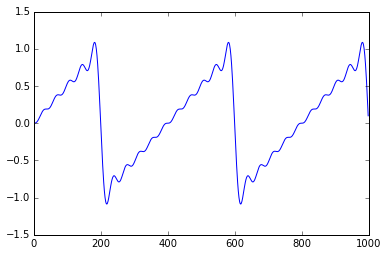

In [8]:
with np.load("s_mtx.npz") as data:
    s_saw_mtx = data["s_saw_mtx"]
plt.plot(s_saw_mtx.real[0:1000]);

<center><img src="pics/Fourier_series_sawtooth_wave_circles.gif" width="500"></center>
<center>Image taken from [<https://www.wikipedia.org>]</center>

### Square wave synthesis

$$
c_{k,\, \mathrm{sqr}} \ = \ \begin{cases}
\frac{1}{2} & \text{for }k = 0\\
{-j \over k \pi} & \text{for } k = \pm 1,\, \pm 3,\, \pm 5 \ldots \\
0  & \text{for } k = \pm 2,\, \pm 4,\, \pm 6 \ldots
\end{cases}
$$

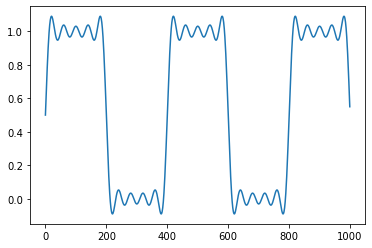

In [10]:
with np.load("s_mtx.npz") as data:
    s_sqr_mtx = data["s_sqr_mtx"]
plt.plot(s_sqr_mtx.real[0:1000]);

<center><img src="pics/Fourier_series_square_wave_circles.gif" width="500"></center>
<center>Image taken from [<https://www.wikipedia.org>]</center>

## <font color="red">Exercise: Fourier Series</font>

Synthesize a square wave using FS synthesis

* Implement it first using the finite summation formula given above

* Implement it using the matrix/vector multiplication version of the FS: $ \textbf{s} =\textbf{c}_{k}^\intercal \textbf{W}$ (compare the 2 implementations speed using the `%timeit` magic function) 

    * $\intercal$, standing for the vector transpose

    * $\textbf{W}$, a matrix of complex values

    * ___Note:___ _we're using a matrix to contain values that are supposed to be continuous, since we're actually discretizing them to be able to do the computation._

* Could you plot the real values of the matrix line by line (to get 2*N+1 plots), and explain what you see. What do the curves represent? (don't forget to plot only a subset of the time domain for readability, and possibly a subset of the 2*N+1 coefficients for the same reason)

BONUS:

* Using your intuition, how can you check that a particular sine wave is composing the synthesized signal?

* Implement your solution the measure the presence of a particular sine wave in this square wave and comment it

### Note on the $\textbf{W}$ Matrix building

In order to create the $\textbf{W}$ matrix, you can use the `matrix` numpy class methods:

* First create 2 arrays: `t_arr` (the time vector with $1/f_s$ step) and `n_arr` (integer from -N to +N)

* Use `np.asmatrix()` to access to array as a matrix (point to the same object)

* Use the matrix multiplication property to build the $\textbf{W}$ matrix (transpose one of them with `.T`)


## Fourier Transforms

They are __4 categories__:

| Name | Time domain | Frequency domain |
|---|---|---|
|Continuous Time Fourier Transform (CTFT) | Continuous – Aperiodic| Continuous – Aperiodic |
|___Fourier Series (FS)___ | <font color="red">___Continuous – Periodic___</font>| ___Discrete – Aperiodic___ |
|Discrete Time Fourier Transform (DTFT) | Discrete – Aperiodic |  Continuous – Periodic |
|__Discrete Fourier Transform (DFT)__ | __Discrete – Periodic__| __Discrete – Periodic__ |

<center><img src="pics/FT_types.png"></center>
<center>Image taken from [1]</center>

* A __transform__ could be looked as an extension of a function, for which __multiple input values__ return __multiple output values__ (not necessary equal in numbers)

* Transforms may modify the type of data (continuous-discrete and vice-versa)

* An __infinite number of sinusoids__ is are required to synthesize an __aperiodic__ signal (__continuous spectrum__)

* The only FT applicable to a computer is the __DFT__

* __All these transforms extend to $\pm \infty$!__

* In order to process a finite signal, we pretend it actually __repeats__ itself an infinite number of times.

## Some CTFT pairs

<center><img src="pics/transform_pairs.gif"></center>
<center>Image taken from [<http://members.optushome.com.au/walshjj/transform_pairs.gif>]</center>

## Some FT properties

Signal (time-domain) | FT (frequency-domain) | Note
---|---|---
$a\cdot s_1(t) + b\cdot s_2(t)$ | $a\cdot S_1(\varOmega) + b\cdot S_2(\varOmega)$ | The FTs are linear processes (see below)
$s(t - t_0)$ | $S(\varOmega)\,e^{-j \varOmega\, t_0}$ | __Shift__ in the time domain
$s(\alpha\, t)$| $\frac{1}{|\alpha|} S \left( \frac{\varOmega}{\alpha} \right) $ | __Time compression__ (extension)
$\delta(t)$ | 1 | Dirac-delta function (_see below_)
$s_1(t) * s_2(t)$ | $S_1(\varOmega)\,S_2(\varOmega)$ | __Convolution__ (_see below_)
$s(t) = \operatorname{Re}\{s(t)\}$ | $S(-\varOmega) = S^*(\varOmega)$ | __Real__ time domain $\Leftrightarrow$ __Hermitian__ frequency domain

___Note: all these properties are reciprocal___

__Real__ time domain $\Leftrightarrow$ __Hermitian__ frequency domain (and vice versa): 

* A real time domain signal corresponds to a frequency spectrum with an even real part, and an odd imaginary part

* It leads to a spectrum with an even amplitude: $|X(\varOmega)| = |X(-\varOmega)|$ and an odd phase: $\angle X(\varOmega) = -\angle X(-\varOmega)$

<center>Spectrum amplitude</center>
<center><img src="pics/Sym_even.png"></center>

<center>Spectrum phase</center>
<center><img src="pics/Sym_odd.png"></center>
<center>Image taken from [1]</center>

## The DFT

The DFT could be compared to the FS, with the difference that the time-domain signal lies in the discrete world.

This implies that the frequency domain is also a periodic signal (aliasing).

As for the FS there is also an analysis and a synthesis process:

* The analysis is simply called the __DFT__ or the __forward DFT__ (time-domain to frequency-domain)

* The synthesis is called the __inverse DFT__ (__IDFT__) (frequency-domain to time-domain)

The __DFT__ uses the principle of correlation to analyze the signal. It divides the signal spectrum linearly in _bins_, and compute the correlation of the signal with the different frequency bins, called the basis functions.

These elements of the basis must be uncorrelated with each other, they are thus an __orthogonal basis__.

__Forward DFT__:
$$\displaystyle X[k] = \sum_{n=0}^{N-1}x[n]e^{-j2\pi \frac{k}{N}n}, \qquad k=0,1,2,\ldots,N-1$$

__IDFT__:
$$\displaystyle x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{j2\pi \frac{n}{N}k}, \qquad k=0,1,2,\ldots,N-1$$

Or in matrix notation:

$$ \textbf{X} =\textbf{x}_{n}^\intercal \textbf{W}_N^* $$

$$ \textbf{x} =\textbf{X}_{k}^\intercal \textbf{W}_N $$

<center><img src="pics/DFT-rect.png" width="500"></center>
<center>Image taken from [1]</center>

## <font color="red">Exercise: DFT</font>

* Apply the DFT from the above formula to a rectangular function, placed in the middle of the array, using an adapted version of the code used for the FS

* Compare the FS and the DFT implementation and comment what you observe, in particular regarding the matrix shape

* Use the `%timeit` magic function to check the time needed to process the DFT computing 

# Fast Fourier Transform (FFT)

$$w_N^{kn} \doteq e^{j2\pi \frac{k}{N}n}$$ 

$$w_{N-k} = w_k^*$$

$$\begin{array}{l}
\begin{pmatrix}
X_0 \\
X_1 \\
X_2 \\
\vdots \\
X_{N-1}
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 & 1 & \cdots & 1\\
1 & w & w^2 & \cdots & w^{N-1}\\
1 & w^2 & w^4 & \cdots & w^{2(N-1)}\\
\vdots & \vdots & \vdots & \ddots & \vdots &\\
1 & w^{N-1} & w^{2(N-1)} & \cdots & w^{(N-1)^2}
\end{pmatrix}
\end{array}
\begin{pmatrix}
x_0 \\
x_1 \\
x_2 \\
\vdots \\
x_{N-1}
\end{pmatrix}
,
w = w_N = e^{\frac{-j2\pi}{N}}
$$

$w_N^{kn}$ is called the twiddle-factor.

<center><img src="pics/FFT-DIT.png"></center>
<center>FFT: full radix-2 Decimation-In-Time (DIT) [4]</center>

<center><img src="pics/FFT-DIT-butterfly.png"></center>
<center>FFT: DIT butterfly operation [4]</center>

FFT uses a process called Decimation-In-Time (DIT) to split the signal in the time domain into 2, recursively until the remaining is actually a length-2 DFT.

A basic butterfly operation requires only 1 twiddle-factor computation, which will then be added and subtracted to the 2 branches respectively.

## <font color="red">Exercise: FFT</font>

* Apply the FFT using `np.fft.fft()` to the same rectangular function in the middle of the array, and compare the result obtained with your own DFT function

* Move the rectangular function to set it around 0 and check the FFT output changes if any (after this step the rectangular function will be split into 2 parts if you plot from 0 to N-1, but this is not an issue)

* Change the length of the FFT using the `n=` parameter in the `fft` function, and check the change in the FFT output

* Change the length of the rectangular function (number of ones) and check the FTT output changes

* Relate the observed values of the Sinc function to what is expected as in the Fourier pair presented above

* Are we in the continuous or discrete world? Another way to ask would be: is it a FT or a DFT? Explain what information is possibly missing in the plot of the FFT output to be consistent with the theory.

# Systems

## Linear Time-Invariant (LTI) Systems

A system is called linear if it has two mathematical properties [1]: 

* homogeneity:

$$x[n] \rightarrow y[n] \Longleftrightarrow k\,x[n] \rightarrow k\,y[n]$$

* additivity: 

$$\begin{cases} 
x_1[n] \rightarrow y_1[n]\\
x_2[n] \rightarrow y_2[n]
\end{cases}
\Longleftrightarrow x_1[n]+x_2[n] \rightarrow y_1[n]+y_2[n]$$

and Time-invariant if:

$$x[n] \rightarrow y[n] \Longleftrightarrow x[n+s] \rightarrow y[n+s]$$

DSP processing is an LTI process. Signals are scaled and then added and subtracted, that's all!

## Dirac-delta function

In the analog domain, the Dirac-delta function is expressed as:

$$\delta(x) = \begin{cases} +\infty, & x = 0 \\ 0, & x \ne 0 \end{cases}$$

$$\int_{-\infty}^\infty \delta(x) \, dx = 1$$

<center><img src="pics/Dirac_function_approximation.gif"></center>
<center>Image taken from [<https://www.wikipedia.org>]</center>

<center>It could be approximated as $\delta_a(x) = \frac{1}{a \sqrt{\pi}} \mathrm{e}^{-x^2/a^2}$ with $a \rightarrow 0$.</center>

In the digital domain, the Dirac-delta function is expressed as:

$$\delta[n] = \begin{cases} 1, & n = 0 \\ 0, & n \ne 0 \end{cases}$$

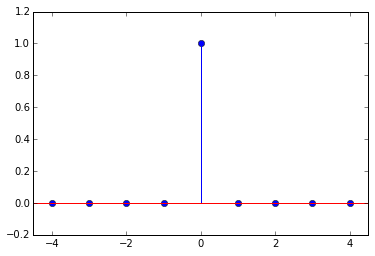

In [10]:
plt.ylim((-0.2, 1.2))
plt.xlim((-4.5, 4.5))
plt.stem(np.arange(-5, 6), [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]);

## Impulse response

<center><img src="pics/Impulse_resp.png"></center>
<center>Image taken from [1]</center>

## Convolution

Continuous domain:

$$f(t) * g(t)\ \ \, \stackrel{\mathrm{def}}{=}\ \int_{-\infty}^{+\infty} f(\tau)\, g(t - \tau)\, d\tau$$

Discrete domain:

$$f[n] * g[n]\ \stackrel{\mathrm{def}}{=}\ \sum_{m=-\infty}^{+\infty} f[m]\, g[n - m]$$

<center><img src="pics/Convolution.png"></center>
<center>Image taken from [1]</center>

$$x[n] * h[n] = y[n]$$

<center>$h[n]$ is the impulse response:</center>

$$\delta[n] * h[n] = h[n]$$

## Cross-correlation

$$f[n] \star g[n]\ \stackrel{\mathrm{def}}{=} \sum_{m=-\infty}^{+\infty} f^{*}[m]\ g[m+n].$$

<center>With $f^*$ the complex conjugate of $f$</center>

<center><img src="pics/Comparison_convolution_correlation.svg.png"></center>
<center>Image taken from [<https://www.wikipedia.org>]</center>

## <font color="red">Exercise: Convolution</font>

* Implement the convolution function using the above formula
* Apply the convolution of a rectangular function by an impulse response $\delta[n]$, comment what you see
* Apply then the convolution of the rectangular function by a shifted impulse response e.g., $\delta[n-50]$, comment what you see
* Apply the convolution between 2 rectangular functions, comment what you see.

# References

1. _The Scientist and Engineer's Guide to Digital Signal Processing_, copyright ©1997-1998 by Steven W. Smith. For more information visit the book's website at: <http://www.dspguide.com>

2. Alan Oppenheim, Ronald Schaffer, _Digital signal processing — 2nd edition_, Prentice Hall, Englewood Cliffs, 1991

3. Smith, J.O., _Mathematics of the Discrete Fourier Transform (DFT) with Audio Applications_, Second Edition, <http://ccrma.stanford.edu/~jos/mdft/>, online book, 2007 edition

4. Douglas L. Jones, _Decimation-in-time (DIT) Radix-2 FFT_, OpenStax CNX, <http://cnx.org/contents/ce67266a-1851-47e4-8bfc-82eb447212b4@7@7>, September 15, 2006